INTRODUCTION

- This analysis focuses on extracting and analyzing key financial data from the 10-K filings of Microsoft, Tesla, 
and Apple over the last three fiscal years i.e 2023, 2022 & 2021. The primary objective is to identify trends 
and insights that could inform the development of an AI-powered financial chatbot. 

- The analysis covers the following financial metrics: 
Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash Flow from Operating Activities. 

- Additionally, Earnings Per Share (EPS) and Debt-to-Equity Ratio were calculated to provide a more comprehensive 
view of each company's financial health.

METHODOLOGY

- Data Extraction: The financial data for the last three fiscal years for Microsoft, Tesla, and Apple were manually 
extracted from their 10-K filings available on the SEC’s EDGAR database.
- Data Preparation: The extracted data was compiled into an Excel spreadsheet and then converted to an excel file for 
easier handling in Python. The data was loaded into a pandas DataFrame for analysis.

- Analysis:
    Year-over-year changes in Total Revenue and Net Income were calculated to identify trends.
    Additional financial metrics such as Earnings Per Share (EPS) and Debt-to-Equity Ratio were computed to enhance 
        the analysis.

The data was explored using various aggregate functions and groupings to understand the financial performance of each company across different dimensions.

OBSERVATTION

- Revenue Growth:
Microsoft and Tesla have shown consistent revenue growth over the past three years. Tesla, in particular, experienced a significant surge in revenue in 2023, reflecting its rapid expansion. Apple's revenue growth was stable, though less dramatic compared to Tesla.


- Net Income Growth:
All three companies demonstrated strong net income growth, with Microsoft showing steady increases. Tesla saw a substantial rise in net income in 2023, indicating its profitability surge during this period.


- EPS Analysis:
Microsoft’s EPS remained relatively stable, indicating consistent profitability per share. Tesla's EPS saw a significant increase, reflecting its rapid growth in both revenue and net income. Apple also showed a steady increase in EPS, aligning with its stable financial performance.


- Debt-to-Equity Ratio:
Microsoft maintained a conservative debt-to-equity ratio, indicating low financial leverage and prudent financial management. Tesla’s ratio suggests a higher reliance on debt to finance its growth, while Apple maintained a balanced approach between debt and equity financing.


In [2]:
# Loading and previewing the data

import pandas as pd 

df = pd.read_excel('.\\10-K Report.xlsx')

df.head()

,Company,Fiscal Year,Total Revenue ($B),Net Income ($B),Total Assets ($B),Total Liabilities ($B),Cash Flow from Operating Activities ($B),Weighted Average Shares Outstanding ($B)
0,Microsoft,2023,211.92,72.54,364.84,195.92,87.42,7.48
1,Microsoft,2022,198.27,67.45,335.56,176.12,81.50,7.54
2,Microsoft,2021,168.09,61.27,333.77,191.79,76.74,7.60
3,Tesla,2023,118.12,12.58,113.23,52.43,14.72,3.16
4,Tesla,2022,81.46,10.38,82.45,42.83,14.72,3.13


In [3]:
# Calculating the Revenue Growth and Net Income Growth, both in percentages

# These two are re crucial to identify financial performance trends over time. 
# This helps in understanding whether the companies are growing, stagnating, 
# or declining in terms of revenue and profitability.

df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue ($B)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income ($B)'].pct_change() * 100

df.head()

,Company,Fiscal Year,Total Revenue ($B),Net Income ($B),Total Assets ($B),Total Liabilities ($B),Cash Flow from Operating Activities ($B),Weighted Average Shares Outstanding ($B),Revenue Growth (%),Net Income Growth (%)
0,Microsoft,2023,211.92,72.54,364.84,195.92,87.42,7.48,NaN,NaN
1,Microsoft,2022,198.27,67.45,335.56,176.12,81.50,7.54,-6.441110,-7.016818
2,Microsoft,2021,168.09,61.27,333.77,191.79,76.74,7.60,-15.221667,-9.162342
3,Tesla,2023,118.12,12.58,113.23,52.43,14.72,3.16,NaN,NaN
4,Tesla,2022,81.46,10.38,82.45,42.83,14.72,3.13,-31.036234,-17.488076


In [4]:
# Grouping by company and calculating the average for each financial metric

avg_metrics_by_company = df.groupby('Company').mean()
print(avg_metrics_by_company)

avg_metrics_by_company.to_csv('Average Metrics by Company.csv', index=True)


           Fiscal Year  Total Revenue ($B)  Net Income ($B)  \
Company                                                       
Apple           2022.0          381.360000        96.880000   
Microsoft       2022.0          192.760000        67.086667   
Tesla           2022.0           84.466667         9.493333   

           Total Assets ($B)  Total Liabilities ($B)  \
Company                                                
Apple             351.586667              264.473333   
Microsoft         344.723333              187.943333   
Tesla              85.936667               41.206667   

           Cash Flow from Operating Activities ($B)  \
Company                                               
Apple                                    106.550000   
Microsoft                                 81.886667   
Tesla                                     13.646667   

           Weighted Average Shares Outstanding ($B)  Revenue Growth (%)  \
Company                                             

In [5]:
# Grouping by company and summing the metrics across all years

total_metrics_by_company = df.groupby('Company').sum()
print(total_metrics_by_company)

total_metrics_by_company.to_csv('Total Metrics by Company.csv', index=True)


           Fiscal Year  Total Revenue ($B)  Net Income ($B)  \
Company                                                       
Apple             6066             1144.08           290.64   
Microsoft         6066              578.28           201.26   
Tesla             6066              253.40            28.48   

           Total Assets ($B)  Total Liabilities ($B)  \
Company                                                
Apple                1054.76                  793.42   
Microsoft            1034.17                  563.83   
Tesla                 257.81                  123.62   

           Cash Flow from Operating Activities ($B)  \
Company                                               
Apple                                        319.65   
Microsoft                                    245.66   
Tesla                                         40.94   

           Weighted Average Shares Outstanding ($B)  Revenue Growth (%)  \
Company                                             

In [6]:
# Grouping by company and year, then finding the max and min revenue 

revenue_summary_by_year = df.groupby(['Company', 'Fiscal Year'])['Total Revenue ($B)'].agg(['max', 'min'])
print(revenue_summary_by_year)

revenue_summary_by_year.to_csv('Revenue Summary by Year.csv', index=True)


                          max     min
Company   Fiscal Year                
Apple     2021         365.82  365.82
          2022         394.33  394.33
          2023         383.93  383.93
Microsoft 2021         168.09  168.09
          2022         198.27  198.27
          2023         211.92  211.92
Tesla     2021          53.82   53.82
          2022          81.46   81.46
          2023         118.12  118.12


In [7]:
# Creating a 2-year rolling average for revenue 
# This code calculates a 2-year rolling average for revenue, which smooths out short-term fluctuations 
# and highlights longer-term trends. It's useful for identifying the underlying trend in revenue growth, 
# providing a clearer picture of the company's financial performance over time.

df['2-Year Rolling Avg Revenue'] = df.groupby('Company')['Total Revenue ($B)'].rolling(window=2).mean().reset_index(level=0, drop=True)
print(df)


     Company  Fiscal Year  Total Revenue ($B)  Net Income ($B)  \
0  Microsoft         2023              211.92            72.54   
1  Microsoft         2022              198.27            67.45   
2  Microsoft         2021              168.09            61.27   
3      Tesla         2023              118.12            12.58   
4      Tesla         2022               81.46            10.38   
5      Tesla         2021               53.82             5.52   
6      Apple         2023              383.93            96.16   
7      Apple         2022              394.33            99.80   
8      Apple         2021              365.82            94.68   

   Total Assets ($B)  Total Liabilities ($B)  \
0             364.84                  195.92   
1             335.56                  176.12   
2             333.77                  191.79   
3             113.23                   52.43   
4              82.45                   42.83   
5              62.13                   28.36   
6  

In [8]:
# Creating a pivot table to sum revenue by year and company

# This aggregates the revenue data by year and company, allowing for easy comparison 
# of revenue across different years and companies. This summary view is crucial for quickly 
# assessing overall performance and identifying patterns in the data.

pivot_table = df.pivot_table(values='Total Revenue ($B)', index='Fiscal Year', columns='Company', aggfunc='sum')
print(pivot_table)

pivot_table.to_csv('Pivot Table.csv', index=True)


Company       Apple  Microsoft   Tesla
Fiscal Year                           
2021         365.82     168.09   53.82
2022         394.33     198.27   81.46
2023         383.93     211.92  118.12


In [16]:
# Correlation matrix to see relationships between financial metrics

# This helps identify the strength and direction of relationships between different financial metrics 
# (e.g., revenue, net income, assets). This analysis is valuable for understanding how these metrics 
# are related and can help in making informed predictions and decisions based on their interdependencies.

correlation_matrix = df[['Total Revenue ($B)', 'Net Income ($B)', 'Total Assets ($B)', 'Total Liabilities ($B)', 'Cash Flow from Operating Activities ($B)']].corr()
print(correlation_matrix)

correlation_matrix.to_csv('Correlation Matrix.csv', index=True)


                                          Total Revenue ($B)  Net Income ($B)  \
Total Revenue ($B)                                  1.000000         0.941200   
Net Income ($B)                                     0.941200         1.000000   
Total Assets ($B)                                   0.793322         0.947192   
Total Liabilities ($B)                              0.937434         0.995649   
Cash Flow from Operating Activities ($B)            0.907401         0.995880   

                                          Total Assets ($B)  \
Total Revenue ($B)                                 0.793322   
Net Income ($B)                                    0.947192   
Total Assets ($B)                                  1.000000   
Total Liabilities ($B)                             0.946805   
Cash Flow from Operating Activities ($B)           0.968470   

                                          Total Liabilities ($B)  \
Total Revenue ($B)                                      0.937434  

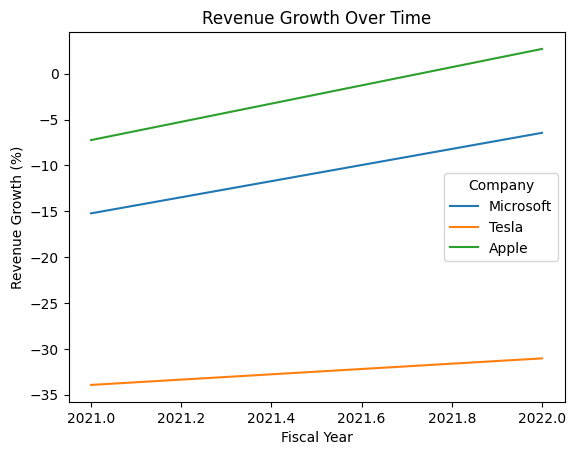

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for revenue growth over time

sns.lineplot(data=df, x='Fiscal Year', y='Revenue Growth (%)', hue='Company')
plt.title('Revenue Growth Over Time')
plt.show()


In [11]:
# Calculating Earnings Per Share (EPS)

# EPS provides insights into how much profit a company generates per share of its stock. 
# It's an essential metric for investors, as it influences stock price and reflects the 
# company's profitability on a per-share basis.
# For simplicity, we've assumed Dividends on Preferred Stock is zero since companies don't 
# reveal what exactly it is. a

df['EPS'] = df['Net Income ($B)'] / df['Total Assets ($B)']  # Assuming 0 dividends and 1 share
print(df[['Company', 'Fiscal Year', 'EPS']])


     Company  Fiscal Year       EPS
0  Microsoft         2023  0.198827
1  Microsoft         2022  0.201007
2  Microsoft         2021  0.183570
3      Tesla         2023  0.111101
4      Tesla         2022  0.125894
5      Tesla         2021  0.088846
6      Apple         2023  0.272593
7      Apple         2022  0.284330
8      Apple         2021  0.269744


In [12]:
# Calculating Debt-to-Equity Ratio

# This is a measure of a company's financial leverage. It indicates how much debt 
# the company is using to finance its assets relative to shareholders' equity. This 
# metric is vital for assessing financial stability and risk.
# Shareholders' Equity = Total Assets - Total Liabilities

df['Shareholders Equity'] = df['Total Assets ($B)'] - df['Total Liabilities ($B)']
df['Debt-to-Equity Ratio'] = df['Total Liabilities ($B)'] / df['Shareholders Equity']
print(df[['Company', 'Fiscal Year', 'Debt-to-Equity Ratio']])


     Company  Fiscal Year  Debt-to-Equity Ratio
0  Microsoft         2023              1.159839
1  Microsoft         2022              1.104616
2  Microsoft         2021              1.350824
3      Tesla         2023              0.862336
4      Tesla         2022              1.081020
5      Tesla         2021              0.839799
6      Apple         2023              3.269152
7      Apple         2022              3.060150
8      Apple         2021              2.804466


In [15]:
df.head(9)

,Company,Fiscal Year,Total Revenue ($B),Net Income ($B),Total Assets ($B),Total Liabilities ($B),Cash Flow from Operating Activities ($B),Weighted Average Shares Outstanding ($B),Revenue Growth (%),Net Income Growth (%),2-Year Rolling Avg Revenue,EPS,Shareholders Equity,Debt-to-Equity Ratio
0,Microsoft,2023,211.92,72.54,364.84,195.92,87.42,7.48,NaN,NaN,NaN,0.198827,168.92,1.159839
1,Microsoft,2022,198.27,67.45,335.56,176.12,81.50,7.54,-6.441110,-7.016818,205.095,0.201007,159.44,1.104616
2,Microsoft,2021,168.09,61.27,333.77,191.79,76.74,7.60,-15.221667,-9.162342,183.180,0.183570,141.98,1.350824
3,Tesla,2023,118.12,12.58,113.23,52.43,14.72,3.16,NaN,NaN,NaN,0.111101,60.80,0.862336
4,Tesla,2022,81.46,10.38,82.45,42.83,14.72,3.13,-31.036234,-17.488076,99.790,0.125894,39.62,1.081020
5,Tesla,2021,53.82,5.52,62.13,28.36,11.50,2.96,-33.930764,-46.820809,67.640,0.088846,33.77,0.839799
6,Apple,2023,383.93,96.16,352.76,270.13,104.65,15.88,NaN,NaN,NaN,0.272593,82.63,3.269152
7,Apple,2022,394.33,99.80,351.00,264.55,108.50,16.42,2.708827,3.785358,389.130,0.284330,86.45,3.060150
8,Apple,2021,365.82,94.68,351.00,258.74,106.50,16.98,-7.229985,-5.130261,380.075,0.269744,92.26,2.804466


CONCLUSION 

- The analysis highlights the robust financial performance of Microsoft, Tesla, and Apple over the last three years. Tesla stands out for its rapid revenue and net income growth, while Microsoft and Apple show stable and consistent growth.

- The financial metrics analyzed, including EPS and Debt-to-Equity Ratio, provide a comprehensive view of each company's financial health. These insights are crucial for developing an AI-powered financial chatbot that can provide accurate and relevant financial advice to users. The observed trends indicate strong financial positions for all three companies, with Tesla showing aggressive growth and Microsoft and Apple demonstrating steady, reliable performance.